# Lab1 - Platform

## Creating Platform

### Quick way

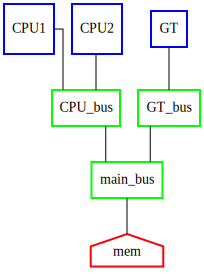

In [1]:
from asap.system_platform import Platform
from asap.hw import Clock
from asap.ips import IP, Driver, ExecutingUnit, Port
from asap.buses import Bus
from asap.memories import Memory

# Creating clocks
s_clk = Clock(name='s_clk', period=0.005)
g_clk = Clock(name='g_clk', period=0.01)
a_clk = Clock(name='a_clk', period=0.001)

sys_platform = Platform("Plat",
                        clocks=[a_clk, g_clk, s_clk],
                        ips=[IP('CPU1', a_clk, executing_units=[ExecutingUnit('ex_u1', a_clk)], drivers=[Driver('dr1', a_clk)], ports=[Port('p1')], connections=[('dr1', 'p1')]),
                             IP('CPU2', a_clk, executing_units=[ExecutingUnit('ex_u2', a_clk)], drivers=[Driver('dr2', a_clk)], ports=[Port('p2')], connections=[('dr2', 'p2')]),
                             IP('GT', g_clk, executing_units=[ExecutingUnit('ex_ug', g_clk)], drivers=[Driver('dr_g', g_clk)], ports=[Port('p_g')], connections=[('dr_g', 'p_g')])],
                        buses=[Bus(name='CPU_bus', clock=s_clk, bus_width=32), 
                               Bus(name='GT_bus', clock=s_clk),
                               Bus(name='main_bus', clock=s_clk)],
                        memories=[Memory(name='mem', clock=s_clk, size=1024)],
                        ips_connections=[(('CPU1', 'p1'), 'CPU_bus'), (('CPU2', 'p2'), 'CPU_bus'), (('GT', 'p_g'), 'GT_bus')],
                        buses_connections=[('CPU_bus', 'main_bus'), ('GT_bus', 'main_bus')],
                        memories_connections=[('main_bus', 'mem')])
sys_platform

### Step by step

Validating System platform: MTL...
System platform is valid!


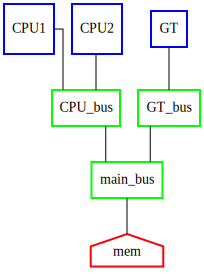

In [2]:
from asap.hw import Clock, GlobalClock
# Platform
sys_platform = Platform("MTL")

# Clocks
clk = GlobalClock("global_clk", 0.01).instance
s_clk = Clock("s_clk", period=0.005)
g_clk = Clock("g_clk", period=0.01)
a_clk = Clock("a_clk", 0.01)

sys_platform.add_clock(clk)
sys_platform.add_clock(a_clk)
sys_platform.add_clock(g_clk)
sys_platform.add_clock(s_clk)

# CPU IP
for i in range(1,3):
    cpu_p = Port('cpu_p{}'.format(i))
    cpu_dr = Driver('dr{}'.format(i), a_clk)
    cpu_ex = ExecutingUnit('ex_u{}'.format(i), a_clk)
    cpu = IP('CPU{}'.format(i), a_clk, [cpu_ex], [cpu_dr], [cpu_p])
    cpu.connect_driver(cpu_dr, cpu_p)
    sys_platform.add_ip(cpu)

# GT IP
gt_p = Port('p_g')
gt_dr = Driver('dr_g', a_clk)
gt_ex = ExecutingUnit('ex_ug', a_clk)
gt = IP('GT', g_clk, [gt_ex], [gt_dr], [gt_p])
gt.connect_driver(gt_dr, gt_p)
sys_platform.add_ip(gt)

# CPU Bus
cpu_bus = Bus('CPU_bus', s_clk, 64)
sys_platform.add_bus(cpu_bus)

# GT Bus
gt_bus = Bus('GT_bus', s_clk)
sys_platform.add_bus(gt_bus)

# Main Bus
main_bus = Bus('main_bus', s_clk)
sys_platform.add_bus(main_bus)

# Memory
mem = Memory('mem', s_clk, 1024)
sys_platform.add_memory(mem)

# Connectivity
for i in range(1,3):
    cpu_name = 'CPU{}'.format(i)
    cpu = sys_platform.get_ip(cpu_name)
    cpu_port = cpu.get_port('cpu_p{}'.format(i))
    sys_platform.connect_to_bus(cpu_port, cpu_bus)
sys_platform.connect_to_bus(gt_p, gt_bus)
sys_platform.connect_to_bus(cpu_bus, main_bus)
sys_platform.connect_to_bus(gt_bus, main_bus)

sys_platform.connect_to_memory(main_bus, mem)

# Validation
sys_platform.validate_platform()
sys_platform

### Modifying platform

#### Adding new CPU (CPU3) and connecting it to CPU_bus

In [3]:
cpu_p = Port('cpu_p3')
cpu_dr = Driver('dr3', a_clk)
cpu_ex = ExecutingUnit('ex_u3', a_clk)
cpu = IP('CPU3', a_clk, [cpu_ex], [cpu_dr], [cpu_p])
cpu.connect_driver(cpu_dr, cpu_p)
sys_platform.add_ip(cpu)

sys_platform.connect_to_bus(cpu_p, cpu_bus)


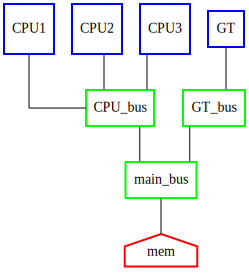

In [4]:
sys_platform

### Clock adjustment

#### Adjust the following: 
#### cpu clock 2GHz -> period = 0.0005us
#### GT clock 800HZ -> period = 0.00125

In [7]:
a_clk.period = 0.0005
g_clk.period = 0.00125